In [43]:
import quandl
import pandas as pd
import numpy as np
df = quandl.get("EOD/AAPL", authtoken="ea6wxDsEqnBF_V_oQ13N")

In [44]:
df.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,493.10,500.60,487.35,488.580,11854600.0,0.0,1.0,15.619650,15.857223,15.437510,15.476472,331928800.0
2013-09-04,499.56,502.24,496.28,498.691,12322600.0,0.0,1.0,15.824280,15.909173,15.720381,15.796753,345032800.0
2013-09-05,500.25,500.68,493.64,495.270,8441700.0,0.0,1.0,15.846136,15.859757,15.636755,15.688388,236367600.0
2013-09-06,498.44,499.38,489.95,498.220,12840200.0,0.0,1.0,15.788802,15.818578,15.519869,15.781833,359525600.0
2013-09-09,505.00,507.92,503.48,506.170,12167400.0,0.0,1.0,15.996600,16.089095,15.948451,16.033661,340687200.0


In [45]:
df['HL_PCT']=(df['Adj_High']- df['Adj_Low'])/df['Adj_Close'] * 100.0
df['PCT_Change']=(df['Adj_Close']-df['Adj_Open'])/df['Adj_Open'] * 100.0

In [46]:
df.tail()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,HL_PCT,PCT_Change
Date,,,,,,,,,,,,,,
2017-12-21,174.17,176.020,174.100,175.01,20949896.0,0.0,1.0,41.899570,42.344619,41.882730,42.101646,83799584.0,1.097080,0.482287
2017-12-22,174.68,175.424,174.500,175.01,16349444.0,0.0,1.0,42.022259,42.201241,41.978957,42.101646,65397776.0,0.527970,0.188917
2017-12-26,170.80,171.470,169.679,170.57,33185536.0,0.0,1.0,41.088858,41.250038,40.819183,41.033528,132742144.0,1.050009,-0.134660
2017-12-27,170.10,170.780,169.710,170.60,21498213.0,0.0,1.0,40.920461,41.084047,40.826640,41.040745,85992852.0,0.627198,0.293945
2017-12-28,171.00,171.850,170.480,171.08,16480187.0,0.0,1.0,41.136972,41.341454,41.011877,41.156217,65920748.0,0.800795,0.046784


In [47]:
df.describe()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,HL_PCT,PCT_Change
count,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03,1090.000000,1090.000000
mean,194.564537,196.114735,193.016676,194.613130,3.605114e+07,0.015642,1.005505,26.367551,26.578236,26.152043,26.373196,1.931334e+08,1.649472,0.026796
std,160.562848,161.812898,159.407381,160.647536,2.194473e+07,0.175122,0.181735,6.614490,6.640870,6.578682,6.616455,1.112891e+08,0.972525,1.147303
min,90.000000,90.700000,89.470000,90.280000,5.704900e+06,0.000000,1.000000,14.189776,14.561974,14.166335,14.258197,4.590369e+07,0.438218,-6.633066
25%,108.042500,108.942500,106.972500,108.007500,2.120714e+07,0.000000,1.000000,22.170235,22.433992,21.948836,22.201030,1.133450e+08,1.033811,-0.603549
50%,121.585000,122.504950,120.640000,121.755000,3.248325e+07,0.000000,1.000000,25.781510,26.055842,25.511496,25.789823,1.681963e+08,1.456946,0.046380
75%,156.905000,157.809625,155.744975,156.515000,4.673778e+07,0.000000,1.000000,29.329099,29.541994,29.133958,29.362853,2.394642e+08,1.965879,0.705480
max,649.900000,651.260000,644.470000,647.350000,1.895606e+08,3.290000,7.000000,42.125703,42.628488,42.065561,42.440845,1.065523e+09,16.291699,8.696110


In [48]:
import math as m

In [49]:
features = ['Adj_Close','PCT_Change','HL_PCT','Adj_Volume']
df = df[features]
df.head()

,Adj_Close,PCT_Change,HL_PCT,Adj_Volume
Date,,,,
2013-09-03,15.476472,-0.916650,2.711941,331928800.0
2013-09-04,15.796753,-0.173953,1.195129,345032800.0
2013-09-05,15.688388,-0.995502,1.421447,236367600.0
2013-09-06,15.781833,-0.044138,1.892738,359525600.0
2013-09-09,16.033661,0.231683,0.877176,340687200.0


In [50]:
pred_feature = 'Adj_Close'
df.fillna(value=99999, inplace=True)
no_of_var = int(m.ceil(0.1 * len(df)))

In [51]:
df['label'] = df[pred_feature].shift(-no_of_var)
df.head()


,Adj_Close,PCT_Change,HL_PCT,Adj_Volume,label
Date,,,,,
2013-09-03,15.476472,-0.916650,2.711941,331928800.0,16.656531
2013-09-04,15.796753,-0.173953,1.195129,345032800.0,16.954931
2013-09-05,15.688388,-0.995502,1.421447,236367600.0,17.178330
2013-09-06,15.781833,-0.044138,1.892738,359525600.0,17.177048
2013-09-09,16.033661,0.231683,0.877176,340687200.0,17.449806


In [52]:
X=np.array(df.drop(['label'], axis=1))


In [53]:
X = preprocessing.scale(X)
X_lately = X[-no_of_var:]


In [54]:
X = X[:-no_of_var]
df.dropna(inplace=True)
y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
from sklearn.linear_model import LinearRegression
clf1 = LinearRegression()

clf1.fit(X_train, y_train)

y_pred1 = clf1.predict(X_test)
print('the coefficient of determination R^2 of the prediction:',clf1.score(X_test, y_test))
print("Mean squared error:",mean_squared_error(y_test, y_pred1))

the coefficient of determination R^2 of the prediction: 0.7047610735477723
Mean squared error: 11.765414803635663


            Adj_Close  PCT_Change    HL_PCT  Adj_Volume     label
Adj_Close    1.000000    0.037675  0.105031    0.541426  0.806341
PCT_Change   0.037675    1.000000  0.051874    0.084372  0.048748
HL_PCT       0.105031    0.051874  1.000000    0.506329  0.194660
Adj_Volume   0.541426    0.084372  0.506329    1.000000  0.535188
label        0.806341    0.048748  0.194660    0.535188  1.000000


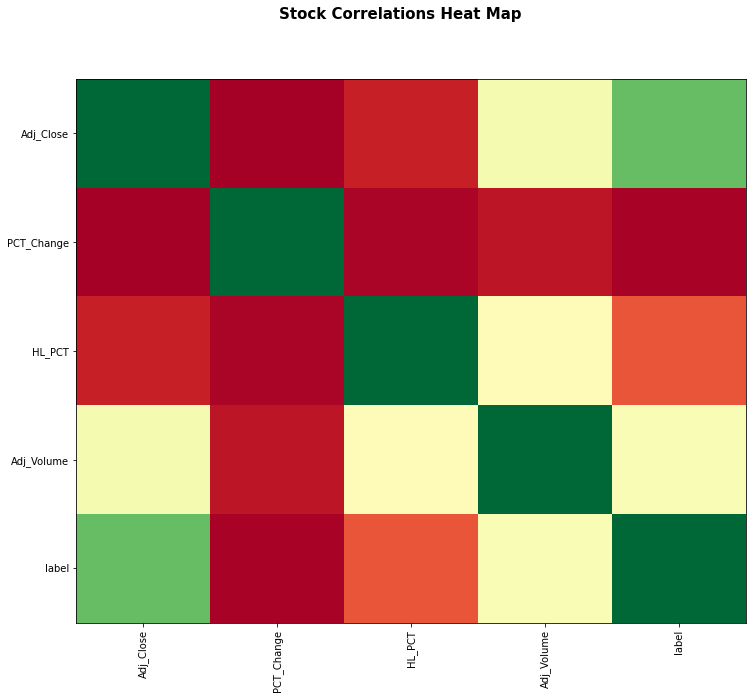

-------------------------------------------------


In [56]:
import matplotlib.pyplot as plt

corr_stocks=df.corr()
corr_stocks=np.absolute(corr_stocks)
print(corr_stocks)
plt.figure(figsize=(12, 10))
plt.imshow(corr_stocks, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.xticks(range(len(corr_stocks)), corr_stocks.columns, rotation='vertical')
plt.yticks(range(len(corr_stocks)), corr_stocks.columns);
plt.suptitle('Stock Correlations Heat Map', fontsize=15, fontweight='bold')
plt.show()
print('-------------------------------------------------')

In [57]:
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#use high low price change and volume as two features
predictor=df[['HL_PCT','Adj_Volume']]
#normalize the predictor
predictor=preprocessing.scale(predictor)
price=df['Adj_Close']
predictor=np.array(predictor)
price=np.array(price)
#using 90% as training data and 10% as testing data
X_train, X_test, y_train, y_test =train_test_split(predictor , price, test_size=0.1,shuffle= False)
clf = linear_model.LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
y_pred1 = clf.predict(X_test)
print('the coefficient of determination R^2 of the prediction:',clf.score(X_test, y_test))
print("Mean squared error:",mean_squared_error(y_test, y_pred1))

the coefficient of determination R^2 of the prediction: -51.60196389174463
Mean squared error: 82.41479146858246


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [58]:
predictor2=df[['Adj_Close','HL_PCT','Adj_Volume']]
predictor2=preprocessing.scale(predictor2)
clf2 = linear_model.LinearRegression(n_jobs=-1)
X_train2, X_test2, y_train2, y_test2 =train_test_split(predictor2 , price, test_size=0.1,shuffle= False)
clf2.fit(X_train2, y_train2)
forecast_set2 = clf2.predict(X_test2)
print('the coefficient of determination R^2 of the prediction:',clf2.score(X_test2, y_test2))
print("Mean squared error:",mean_squared_error(y_test, forecast_set2))
print('Mean squared error is almost 0, the prediction is very well.')

the coefficient of determination R^2 of the prediction: 1.0
Mean squared error: 1.9327889007111982e-28
Mean squared error is almost 0, the prediction is very well.


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
